In [38]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [39]:
data = pd.read_csv('./result.csv')
data.head()

,name,var,rate
0,01d1ad9a-7477-4d69-9a24-9e64a2d96eb7,0.317925,0.891466
1,03f65249-8a7d-4bfe-845d-c70ae39d2c9f,2.027981,9.786941
2,06434818-6953-44c5-87a3-890f7676d7ab,0.640090,41.125971
3,0744bc3d-fb06-48f3-85f4-89af0b24dc0d,2.013322,25.868085
4,0e409b44-467b-4169-8629-b7c1d7439609,1.497575,-119.957818


In [40]:
#fm._rebuild()
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name] # 폰트 검색

In [41]:
sns.set(style='whitegrid', font='KoPubDotum Medium', font_scale=1.2)  # Seaborn 설정

In [42]:
X = data.iloc[:, [1,2]].values
X.shape
m = X.shape[0] # 227
n = X.shape[1] # 2

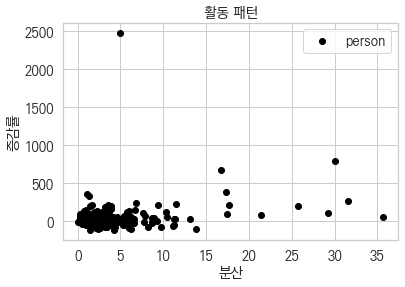

In [57]:
plt.scatter(X[:,0],X[:,1],c='black',label='person')
plt.xlabel('분산')
plt.ylabel('증감률')
plt.legend()
plt.title('활동 패턴')
plt.show()

In [58]:
K=4 # 클러스터 개수
n_iter=100 # 반복 횟수

Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [59]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

Output={} # 출력값 초기화(딕셔너리)

In [60]:
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(227, 0)

array([], shape=(227, 0), dtype=float64)

In [61]:
Centroids[:,0] # shape=(227,)
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (227, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (227, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(227,)

array([3.89452839e+04, 3.55045723e+04, 2.46843403e+04, 2.97033145e+04,
       1.01232786e+05, 6.27050304e+04, 3.59093921e+04, 6.76500689e+04,
       9.27480309e+03, 4.01281633e+04, 2.00556421e+04, 2.91464833e+04,
       4.52261285e+03, 1.60950457e+04, 4.24309409e+04, 2.23855274e+04,
       3.41181492e+04, 4.11834294e+03, 1.49688812e+03, 1.38231551e+04,
       4.21996316e+03, 4.89616591e+04, 2.48570575e+04, 1.46333685e+04,
       4.11847606e+04, 1.85854101e+04, 3.54554460e+05, 3.52749172e+04,
       2.18677991e+04, 3.77371565e+04, 3.29502896e+04, 4.13055291e+04,
       2.23680963e+04, 3.18192721e+04, 6.57611081e+04, 1.74543473e+04,
       7.17483128e+04, 4.89230955e+04, 6.38432201e+03, 5.59889291e+04,
       4.52489717e+04, 5.28208818e+04, 6.31259434e+04, 4.36474316e+04,
       6.36885232e+04, 2.70528192e+04, 5.56977331e+01, 5.52553747e+04,
       1.91414093e+04, 4.53646656e+04, 3.46992723e+04, 7.03028517e+04,
       2.21771253e+04, 4.05327218e+04, 4.15141498e+04, 1.35914123e+04,
      

In [62]:
np.c_[EuclidianDistance,tempDist] # (227, 0) 행렬에 (227,) 옆으로 붙이기

array([[3.89452839e+04],
       [3.55045723e+04],
       [2.46843403e+04],
       [2.97033145e+04],
       [1.01232786e+05],
       [6.27050304e+04],
       [3.59093921e+04],
       [6.76500689e+04],
       [9.27480309e+03],
       [4.01281633e+04],
       [2.00556421e+04],
       [2.91464833e+04],
       [4.52261285e+03],
       [1.60950457e+04],
       [4.24309409e+04],
       [2.23855274e+04],
       [3.41181492e+04],
       [4.11834294e+03],
       [1.49688812e+03],
       [1.38231551e+04],
       [4.21996316e+03],
       [4.89616591e+04],
       [2.48570575e+04],
       [1.46333685e+04],
       [4.11847606e+04],
       [1.85854101e+04],
       [3.54554460e+05],
       [3.52749172e+04],
       [2.18677991e+04],
       [3.77371565e+04],
       [3.29502896e+04],
       [4.13055291e+04],
       [2.23680963e+04],
       [3.18192721e+04],
       [6.57611081e+04],
       [1.74543473e+04],
       [7.17483128e+04],
       [4.89230955e+04],
       [6.38432201e+03],
       [5.59889291e+04],


In [63]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(227, 3)

array([[3.89452839e+04, 2.26865289e+03, 2.92095108e+03, 4.63884309e+03],
       [3.55045723e+04, 1.49266557e+03, 3.95082588e+03, 5.92795956e+03],
       [2.46843403e+04, 6.56516584e+01, 8.87786111e+03, 1.17365971e+04],
       [2.97033145e+04, 5.10893989e+02, 6.23029573e+03, 8.66279447e+03],
       [1.01232786e+05, 2.83371028e+04, 4.48243855e+03, 2.78285251e+03],
       [6.27050304e+04, 1.01183733e+04, 6.31520083e+00, 2.25418423e+02],
       [3.59093921e+04, 1.57983900e+03, 3.82182862e+03, 5.76555952e+03],
       [6.76500689e+04, 1.21557832e+04, 7.87687087e+01, 3.02587545e+01],
       [9.27480309e+03, 2.86777052e+03, 2.40078646e+04, 2.85996245e+04],
       [4.01281633e+04, 2.54785006e+03, 2.59377835e+03, 4.24047452e+03],
       [2.00556421e+04, 1.07304229e+02, 1.20951921e+04, 1.54376473e+04],
       [2.91464833e+04, 4.50339899e+02, 6.50282431e+03, 8.97464632e+03],
       [4.52261285e+03, 6.83070788e+03, 3.38722653e+04, 3.92988734e+04],
       [1.60950457e+04, 5.33224283e+02, 1.54764896e

In [64]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C # shape=(227,)

array([2, 2, 2, 2, 4, 3, 2, 4, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3,
       2, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 1, 3, 2, 3, 2, 4, 2, 3, 3, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 1,
       4, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       2, 1, 3, 3, 3, 2, 1, 2, 3, 2, 3, 2, 2, 2, 2, 4, 3, 2, 2, 3, 3, 2,
       2, 3, 1, 4, 2, 3, 2, 2, 2, 2, 4, 3, 2, 3, 2, 2, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 3, 1, 3, 3, 4, 2, 2, 4, 2, 2, 2,
       2, 3, 4, 2, 2, 2, 1, 3, 2, 1, 4, 2, 4, 2, 4, 2, 2, 2, 2, 3, 3, 1,
       3, 3, 2, 2, 4, 2, 2, 2, 1, 4, 3, 3, 2, 2, 2, 2, 3, 2, 3, 4, 2, 1,
       4, 3, 2, 2, 3, 2, 2, 2, 4, 1, 1, 4, 1, 2, 1, 3, 3, 3, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2], dtype=int64)

In [65]:
Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64)}

In [66]:
# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m=22
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[6.01533747e+00, 2.31222348e+00, 3.94399150e+00, 7.01448173e-01,
         3.00526189e+01, 3.15566592e+00, 3.51973057e+00, 1.01725861e+00,
         6.79974519e+00, 1.66720010e+00, 3.94101689e+00, 9.12878161e-01,
         1.43507166e+00, 2.81437573e+00, 1.67451233e+01, 3.60764268e+00,
         2.57773249e+01, 1.77207777e+01, 1.09747428e+00, 1.15432255e+01,
         4.90832439e+00, 1.73145247e+01, 9.44107069e+00, 1.36358138e+00,
         3.15567160e+01, 6.72323482e+00, 1.03273324e+01],
        [1.30985424e+02, 1.34050156e+02, 1.59514162e+02, 1.33323384e+02,
         7.93075756e+02, 1.90782145e+02, 1.87925243e+02, 1.52378217e+02,
         2.39431319e+02, 2.15574065e+02, 1.98203800e+02, 1.24219435e+02,
         1.95553566e+02, 1.27052192e+02, 6.81212734e+02, 2.11468989e+02,
         2.02207520e+02, 2.20035488e+02, 3.53094825e+02, 2.27970467e+02,
         2.48087327e+03, 3.80122815e+02, 2.12835745e+02, 3.28714215e+02,
         2.65209620e+02, 1.44407734e+02, 1.26071606e+02]]),
 2:

In [67]:
# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[6.01533747e+00, 1.30985424e+02],
        [2.31222348e+00, 1.34050156e+02],
        [3.94399150e+00, 1.59514162e+02],
        [7.01448173e-01, 1.33323384e+02],
        [3.00526189e+01, 7.93075756e+02],
        [3.15566592e+00, 1.90782145e+02],
        [3.51973057e+00, 1.87925243e+02],
        [1.01725861e+00, 1.52378217e+02],
        [6.79974519e+00, 2.39431319e+02],
        [1.66720010e+00, 2.15574065e+02],
        [3.94101689e+00, 1.98203800e+02],
        [9.12878161e-01, 1.24219435e+02],
        [1.43507166e+00, 1.95553566e+02],
        [2.81437573e+00, 1.27052192e+02],
        [1.67451233e+01, 6.81212734e+02],
        [3.60764268e+00, 2.11468989e+02],
        [2.57773249e+01, 2.02207520e+02],
        [1.77207777e+01, 2.20035488e+02],
        [1.09747428e+00, 3.53094825e+02],
        [1.15432255e+01, 2.27970467e+02],
        [4.90832439e+00, 2.48087327e+03],
        [1.73145247e+01, 3.80122815e+02],
        [9.44107069e+00, 2.12835745e+02],
        [1.36358138e+00, 3.2871

In [68]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(22,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(22, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(22,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

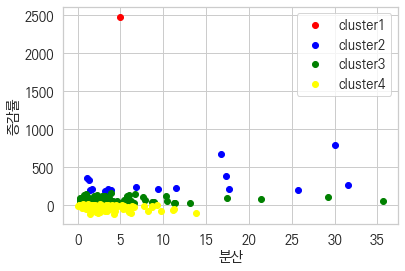

In [69]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green', 'yellow']
labels=['cluster1','cluster2','cluster3', 'cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='pink',label='Centroids')
plt.xlabel('분산')
plt.ylabel('증감률')
plt.legend()
plt.show()